In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('CCF.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

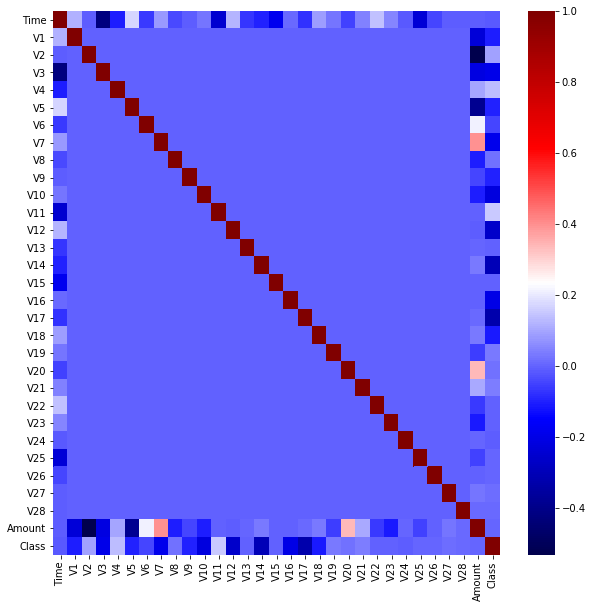

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show();

# Multicollinearity test 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [11]:
df.iloc[:,:-1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [16]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Time,2.339084
1,V1,1.621694
2,V2,3.869377
3,V3,1.255585
4,V4,1.137944
5,V5,2.753075
6,V6,1.522122
7,V7,2.510165
8,V8,1.097151
9,V9,1.018831


# Data pre-processing

In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train = scalar.fit_transform(X_train)

X_test = scalar.transform(X_test)

# Decision Tree model building with grid-search to find optimal parameters

In [17]:
clf = DecisionTreeClassifier()

param = {
    'criterion':["gini","entropy"],
    'max_depth': np.arange(2,10,2)
    
}

metric = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [18]:
def grid_search(eval_score):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param, scoring=metric, refit=eval_score,
                           cv=skf,return_train_score=True)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(eval_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(eval_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    return grid_search

In [19]:
grid_search_clf = grid_search('recall_score')

Best params for recall_score
{'criterion': 'entropy', 'max_depth': 4}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg     85277        19
pos        35       112


In [20]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth','param_criterion']].round(3).head(6)

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_criterion
5,0.855,0.766,0.999,4,entropy
6,0.888,0.763,0.999,6,entropy
7,0.858,0.760,0.999,8,entropy
3,0.893,0.757,0.999,8,gini
2,0.909,0.754,0.999,6,gini
0,0.798,0.730,0.999,2,gini


Considering both precision score and recall score, we will choose max_depth=4 and criterion = "entropy" as the parameters

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
def performance(model,X_text,y_test):
    
    y_pred = model.predict(X_test)
    con=confusion_matrix(y_test, y_pred)
    sensitivity=con[1][1]/(con[1][1]+con[1][0])
    y_prob=model.predict_proba(X_test)
    auprc = metrics.average_precision_score(y_test,y_prob[:,1])

    
    print("auprc:",auprc)
    print("sensitivity:",sensitivity)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [21]:
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
decision_tree = decision_tree.fit(X_train, y_train)


performance(decision_tree,X_test,y_test)

auprc: 0.7377026758148634
sensitivity: 0.7619047619047619
Accuracy: 0.9993679997191109
[[85277    19]
 [   35   112]]


# Oversampling Decision tree

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
def DecisionTree_Over_sampling(strategy,X,y):
        class_1=[]
        class_0=[]
        accuracy=[]
        sensitivity=[]
        auprc=[]
        for i in strategy:
            oversample = RandomOverSampler(sampling_strategy=i)
            # fit and apply the transform
            X_train_over, y_train_over = oversample.fit_resample(X, y)
           
            decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4,criterion='entropy')

            decision_tree = decision_tree.fit(X_train_over, y_train_over)
            y_pred = decision_tree.predict(X_test)
            accuracy.append(metrics.accuracy_score(y_test, y_pred))

            # print(confusion_matrix(y_test_over, y_pred))
            con=confusion_matrix(y_test, y_pred)
            sensitivity.append(con[1][1]/(con[1][1]+con[1][0]))

            y_prob=decision_tree.predict_proba(X_test)

            auprc.append(metrics.average_precision_score(y_test,y_prob[:,1]))

        result=pd.DataFrame({"strategy":strategy,"accuracy":accuracy,"sensitivity":sensitivity,"auprc":auprc})

        return result

In [24]:
strategy=[0.1,0.18,0.2,0.35]
result=DecisionTree_Over_sampling(strategy,X_train,y_train)
result

,strategy,accuracy,sensitivity,auprc
0,0.10,0.999239,0.802721,0.745059
1,0.18,0.995248,0.816327,0.744366
2,0.20,0.995248,0.816327,0.710136
3,0.35,0.995319,0.823129,0.700234


### Strategy chosen= 0.1
#### This decision is made by comparing the overall accuracy , sensitivity and auprc.

# Cost-sensitive Decision tree

In [25]:
def Cost_sensitive_Decision_Tree(weights,X,y):

        accuracy=[]
        sensitivity=[]
        auprc=[]
        for i in weights:
            decision_tree = DecisionTreeClassifier(random_state=0,class_weight=i, max_depth=4,criterion='entropy')
            decision_tree = decision_tree.fit(X_train, y_train)
            y_pred = decision_tree.predict(X_test)
            accuracy.append(metrics.accuracy_score(y_test, y_pred))
            con=confusion_matrix(y_test, y_pred)
            sensitivity.append(con[1][1]/(con[1][1]+con[1][0]))
            y_prob=decision_tree.predict_proba(X_test)
            auprc.append(metrics.average_precision_score(y_test,y_prob[:,1]))

        result=pd.DataFrame({"weights":weights,"accuracy":accuracy,"sensitivity":sensitivity,"auprc":auprc})

        return result



  


In [26]:
weights =[{0:1, 1:2},{0:1, 1:3},{0:1, 1:5}, {0:1, 1:10},{0:1, 1:15},{0:1, 1:30},{0:1, 1:577}]
result=Cost_sensitive_Decision_Tree(weights,X_train,y_train)
result

,weights,accuracy,sensitivity,auprc
0,"{0: 1, 1: 2}",0.999450,0.795918,0.735741
1,"{0: 1, 1: 3}",0.999450,0.795918,0.735741
2,"{0: 1, 1: 5}",0.999333,0.782313,0.730145
3,"{0: 1, 1: 10}",0.999286,0.782313,0.726214
4,"{0: 1, 1: 15}",0.999274,0.816327,0.752306
5,"{0: 1, 1: 30}",0.999251,0.809524,0.751395
6,"{0: 1, 1: 577}",0.987032,0.857143,0.703737


Weight chosen:{1:15}

# SVM

In [47]:

param = {'C': [0.1, 1, 10],
              'kernel': ['rbf']}

metric = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
 

SVM = SVC(random_state=0,probability=True)

In [48]:
def grid_search(eval_score):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(SVM, param, scoring=metric, refit=eval_score,
                           cv=skf,return_train_score=True)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(eval_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(eval_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    return grid_search

In [49]:
grid_search_clf = grid_search('recall_score')
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)


Best params for recall_score
{'C': 10, 'kernel': 'rbf'}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg     85291         5
pos        51        96


In [50]:
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_C','param_kernel']].round(3).head(6)


,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_kernel
2,0.957,0.664,0.999,10,rbf
1,0.950,0.617,0.999,1,rbf
0,0.958,0.128,0.998,0.1,rbf


In [17]:
svclassifier = SVC(C=10,probability=True,kernel="rbf")
svclassifier.fit(X_train, y_train)



SVC(C=10, probability=True)

In [24]:
svclassifier = SVC(C=10,probability=True)
svclassifier.fit(X_train, y_train)


SVC(C=10, probability=True)

In [23]:
performance(svclassifier,X_test,y_test)

auprc: 0.7878267468248028
sensitivity: 0.6530612244897959
Accuracy: 0.9993445923013002
[[85291     5]
 [   51    96]]


In [25]:
performance(svclassifier,X_test,y_test)

auprc: 0.7878267468248028
sensitivity: 0.6530612244897959
Accuracy: 0.9993445923013002
[[85291     5]
 [   51    96]]


# Cost-sensitive SVM

In [5]:
def Cost_sensitive_SVM(weights,X,y):

        accuracy=[]
        sensitivity=[]
        auprc=[]
        for i in weights:
            svclassifier = SVC(C=10,probability=True,kernel='rbf', class_weight=i)
            svclassifier.fit(X_train, y_train)
            y_pred = svclassifier.predict(X_test)
            accuracy.append(metrics.accuracy_score(y_test, y_pred))
            con=confusion_matrix(y_test, y_pred)
            sensitivity.append(con[1][1]/(con[1][1]+con[1][0]))
            y_prob=svclassifier.predict_proba(X_test)
            auprc.append(metrics.average_precision_score(y_test,y_prob[:,1]))

        result=pd.DataFrame({"weights":weights,"accuracy":accuracy,"sensitivity":sensitivity,"auprc":auprc})

        return result


In [32]:
weights =[{0:1, 1:3},{0:1, 1:5}, {0:1, 1:30},{0:1, 1:577}]
result=Cost_sensitive_SVM(weights,X_train,y_train)
result

,weights,accuracy,sensitivity,auprc
0,"{0: 1, 1: 3}",0.999274,0.666667,0.746002
1,"{0: 1, 1: 5}",0.999251,0.666667,0.732220
2,"{0: 1, 1: 30}",0.999087,0.673469,0.696315
3,"{0: 1, 1: 577}",0.999005,0.666667,0.667252


Weight chosen: {1:3}